In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import math
import pandas as pd
import xgboost
import lightgbm
import catboost

from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr
from scipy.special import comb
from itertools import combinations
from sklearn.base import BaseEstimator
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier,
                              ExtraTreesClassifier,
                              VotingClassifier)
from sklearn.tree import (DecisionTreeRegressor,
                          DecisionTreeClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, f1_score

In [25]:
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

### –ó–∞–¥–∞–Ω–∏–µ 1. Bias-variance trade-off

**2 –±–∞–ª–ª–∞**

–ü—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–π—Ç–µ bias-variance trade-off –¥–ª—è `DecisionTreeRegressor` –ø—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–∏ –≥–ª—É–±–∏–Ω—ã –¥–µ—Ä–µ–≤–∞. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—É—é –º–æ–¥–µ–ª—å —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç –æ–¥–Ω–æ–π –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –≤ —è—á–µ–π–∫–µ –Ω–∏–∂–µ, –∏—Å–ø–æ–ª—å–∑—É—è —Ñ—É–Ω–∫—Ü–∏—é `plot_regression_predictions` (–º–æ–∂–µ—Ç–µ –µ–µ –∫–∞–∫-—Ç–æ –ø–æ–º–µ–Ω—è—Ç—å, –µ—Å–ª–∏ –∑–∞—Ö–æ—á–µ—Ç—Å—è). –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥–ª—É–±–∏–Ω—ã –¥–µ—Ä–µ–≤—å–µ–≤, –ø—Ä–∏ –∫–∞–∫–æ–º –∑–Ω–∞—á–µ–Ω–∏–∏, –Ω–∞ –≤–∞—à –≤–∑–≥–ª—è–¥, –º–æ–¥–µ–ª—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–∞, –ø—Ä–∏ –∫–∞–∫–æ–º variance —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–∏–º?

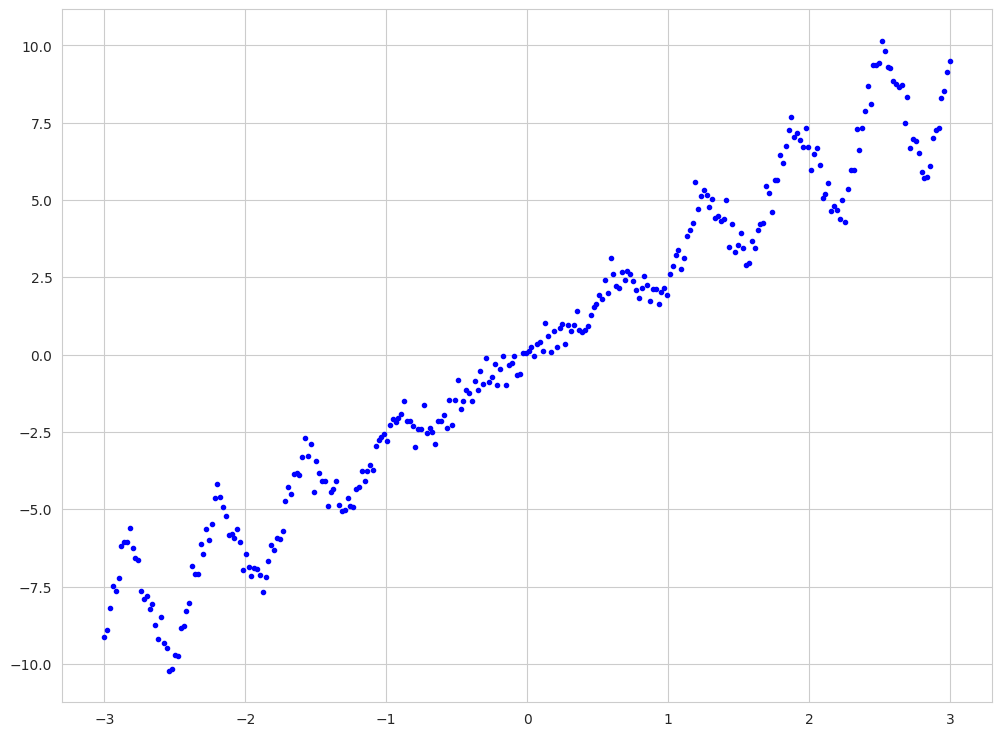

In [14]:
# –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –∫–∞–∫—É—é-–Ω–∏–±—É–¥—å –Ω–µ–æ–±—ã—á–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∏ –Ω–∞—É—á–∏–º—Å—è –µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å
np.random.seed(42)
m = 300
X = np.linspace(-3, 3, m).reshape(-1, 1)
y = (3 + 2/np.pi * np.arcsin(np.cos(10 * X))) * X
y = y + np.random.randn(m, 1) / 3
plt.plot(X.reshape(-1), y.reshape(-1), "b.");

In [15]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π –≤ —Å–ª—É—á–∞–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
def plot_regression_predictions(tree_reg, X, y, axes=[-3, 3, -10, 10], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)

    plt.plot(x1, y_pred, linewidth=2, label=r"$\hat{y}$")

–ò–∑–æ–±—Ä–∞–∑–∏—Ç–µ, –∫–∞–∫ –º–µ–Ω—è—é—Ç—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–µ—Ä–µ–≤–∞ –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≥–ª—É–±–∏–Ω—ã (–º–æ–∂–Ω–æ –≤–∑—è—Ç—å —á—Ç–æ-—Ç–æ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 1 –¥–æ 15):

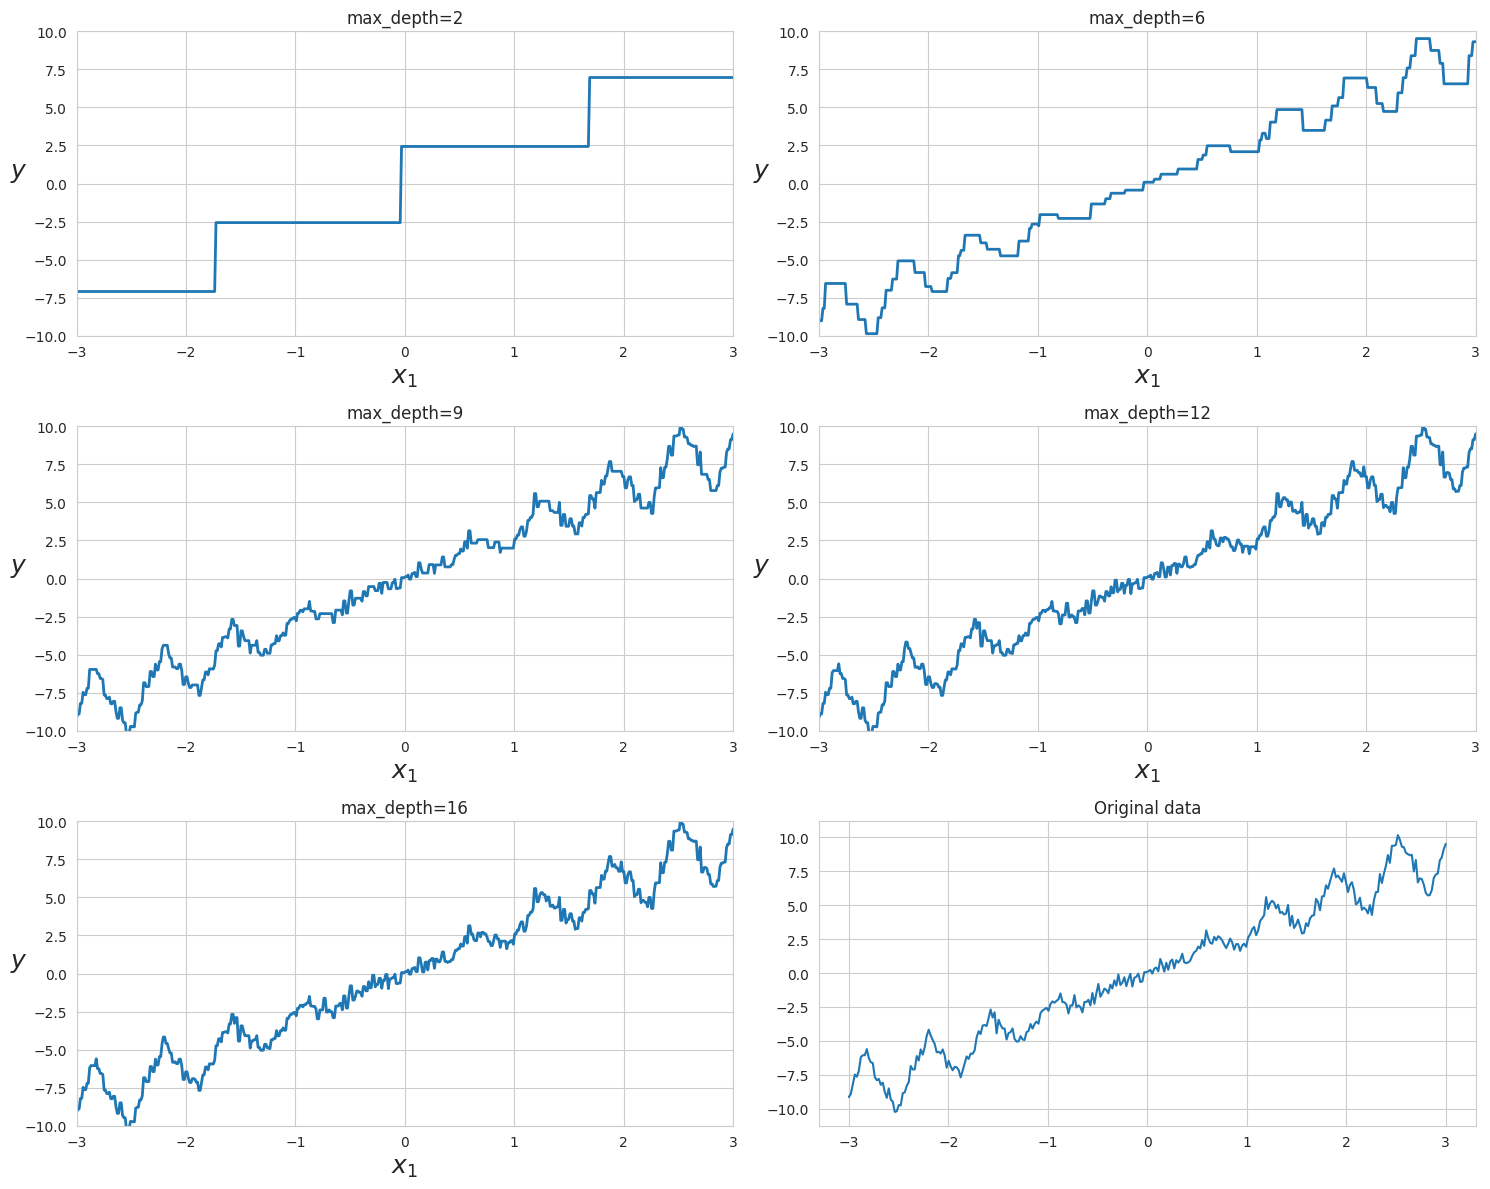

In [16]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=SEED)
tree_reg2 = DecisionTreeRegressor(max_depth=6, random_state=SEED)
tree_reg3 = DecisionTreeRegressor(max_depth=9, random_state=SEED)
tree_reg4 = DecisionTreeRegressor(max_depth=12, random_state=SEED)
tree_reg5 = DecisionTreeRegressor(max_depth=16, random_state=SEED)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)
tree_reg3.fit(X, y)
tree_reg4.fit(X, y)
tree_reg5.fit(X, y)

plt.figure(figsize=(15, 12))

plt.subplot(321)
plot_regression_predictions(tree_reg1, X, y, ylabel="$y$")
plt.title("max_depth=2")

plt.subplot(322)
plot_regression_predictions(tree_reg2, X, y, ylabel="$y$")
plt.title("max_depth=6")

plt.subplot(323)
plot_regression_predictions(tree_reg3, X, y, ylabel="$y$")
plt.title("max_depth=9")

plt.subplot(324)
plot_regression_predictions(tree_reg4, X, y, ylabel="$y$")
plt.title("max_depth=12")

plt.subplot(325)
plot_regression_predictions(tree_reg5, X, y, ylabel="$y$")
plt.title("max_depth=16")

plt.subplot(326)
plt.plot(X, y)
plt.title("Original data")

plt.tight_layout()
plt.show()

–í–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ –º–æ–¥–µ–ª—è—Ö —Å –º–∞–ª–æ–π –≥–ª—É–±–∏–Ω–æ–π —É –Ω–∞—Å –∏–¥–µ—Ç —Å–∏–ª—å–Ω–æ–µ —É–ø—Ä–æ—â–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π(–≤—ã—Å–æ–∫–∏–π bias), –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –æ—Ç—Ä–∞–∂–∞—é—Ç —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –≥–ª—É–±–∏–Ω—ã –º–æ–¥–µ–ª—å –Ω–∞—á–∏–Ω–∞–µ—Ç –ª—É—á—à–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ(—Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å original data). –û–¥–Ω–∞–∫–æ, –º—ã –Ω–µ –∑–Ω–∞–µ–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ –±–æ–ª—å—à–æ–π variance —É –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏(–Ω–∞—Å–∫–æ–ª—å–∫–æ –æ–Ω–∞ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∞), —Ç–∞–∫ –∫–∞–∫ –¥–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏. –î–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º —Ä–∞–∑–¥–µ–ª–∏—Ç—å –≤—ã–±–æ—Ä–∫—É –∏ –æ—Ü–µ–Ω–∏—Ç—å variance —Å –ø–æ–º–æ—â—å—é r2 score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=SEED)
tree_reg2 = DecisionTreeRegressor(max_depth=6, random_state=SEED)
tree_reg3 = DecisionTreeRegressor(max_depth=9, random_state=SEED)
tree_reg4 = DecisionTreeRegressor(max_depth=12, random_state=SEED)
tree_reg5 = DecisionTreeRegressor(max_depth=16, random_state=SEED)
tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)
tree_reg3.fit(X_train, y_train)
tree_reg4.fit(X_train, y_train)
tree_reg5.fit(X_train, y_train)
y_pred1 = tree_reg1.predict(X_test)
y_pred2 = tree_reg2.predict(X_test)
y_pred3 = tree_reg3.predict(X_test)
y_pred4 = tree_reg4.predict(X_test)
y_pred5 = tree_reg5.predict(X_test)
print(f'R2 score of max_depth = 2 model:', r2_score(y_test, y_pred1))
print(f'R2 score of max_depth = 6 model:', r2_score(y_test, y_pred2))
print(f'R2 score of max_depth = 9 model:', r2_score(y_test, y_pred3))
print(f'R2 score of max_depth = 12 model:', r2_score(y_test, y_pred4))
print(f'R2 score of max_depth = 16 model:', r2_score(y_test, y_pred5))



R2 score of max_depth = 2 model: 0.8963960271203124
R2 score of max_depth = 6 model: 0.9860742925187541
R2 score of max_depth = 9 model: 0.9914777283350705
R2 score of max_depth = 12 model: 0.9919977920574086
R2 score of max_depth = 16 model: 0.9919922651330997


–í–∏–¥–Ω–æ, —á—Ç–æ —É –º–æ–¥–µ–ª–∏ —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≥–ª—É–±–∏–Ω–æ–π –≤ 16 r2 –Ω–∏–∂–µ, —á–µ–º —É –º–æ–¥–µ–ª–∏ 12. –ó–Ω–∞—á–∏—Ç, variance –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø–æ—Å–ª–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–π –≥–ª—É–±–∏–Ω—ã –Ω–∞—á–∏–Ω–∞–µ—Ç –ø–æ–≤—ã—à–∞—Ç—å—Å—è.

### –ó–∞–¥–∞–Ω–∏–µ 2. Random forest

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –Ω–µ–º–Ω–æ–≥–æ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–º—Å—è –∫ —Ç–æ–º—É, —á—Ç–æ–±—ã —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Å–≤–æ–π —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–π —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å, –∞ –ø–æ—Ç–æ–º —Ä–µ–∞–ª–∏–∑—É–µ–º –µ–≥–æ.

#### –ó–∞–¥–∞–Ω–∏–µ 2. 1. –ü—Ä–æ—Å—Ç–æ–µ –∞–Ω—Å–∞–º–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

**1 –±–∞–ª–ª–∞**

–ü—Ä–µ–¥—Å—Ç–∞–≤–∏–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å 101 –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä. –ö–∞–∂–¥—ã–π –º–æ–∂–µ—Ç —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é `p` (—Ä–∞–≤–Ω–æ–π –¥–ª—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π) –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –∫–ª–∞—Å—Å –æ–±—ä–µ–∫—Ç–∞. –ë—É–¥–µ–º –¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤—É –≥–æ–ª–æ—Å–æ–≤ (majority vote). –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –æ–±—ä–µ–∫—Ç –æ—Ç –∑–Ω–∞—á–µ–Ω–∏—è `p`. –í–∞–º –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω–∞—è —Å–ª–µ–¥—É—é—â–∞—è —Ñ–æ—Ä–º—É–ª–∞:

$$ \large \mu = \sum_ {i = 51} ^ {101} C_{101} ^ i p ^ i (1-p) ^ {101-i} $$

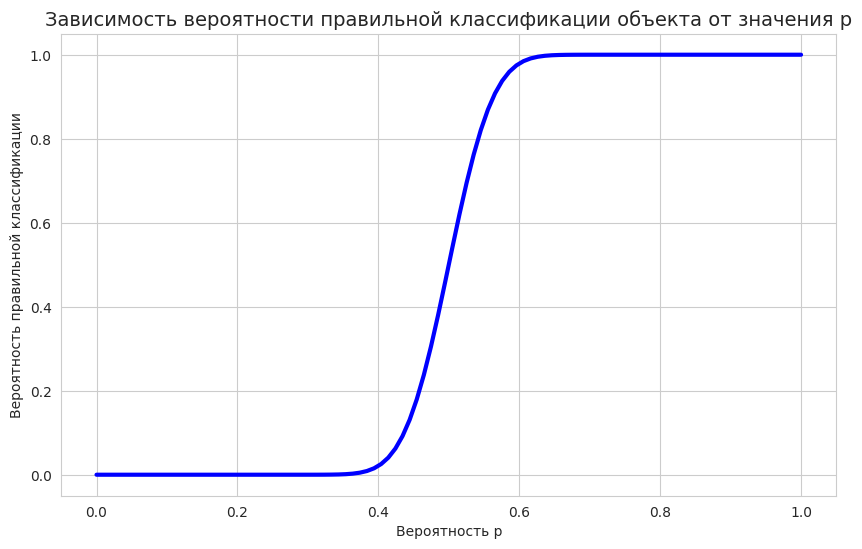

In [31]:
def majority_vote_probability(p):
    total_probability = 0
    for i in range(51, 102):
        total_probability += comb(101, i) * (p**i) * ((1-p)**(101-i))
    return total_probability

p_values = np.linspace(0, 1, 100)
accuracies = [majority_vote_probability(p) for p in p_values]

plt.figure(figsize=(10, 6))
plt.plot(p_values, accuracies, color='blue', linewidth=3)
plt.xlabel('–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å p', fontsize=10)
plt.ylabel('–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏', fontsize=10)
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –æ–±—ä–µ–∫—Ç–∞ –æ—Ç –∑–Ω–∞—á–µ–Ω–∏—è p', fontsize=14)
plt.grid(True)
plt.show()

–ê —Ç–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥—Ä—É–≥—É—é —Å–∏—Ç—É–∞—Ü–∏—é. –£ –Ω–∞—Å –µ—Å—Ç—å —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç –æ–±—ä–µ–∫—Ç `p = 0.65`. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –æ–±—ä–µ–∫—Ç –æ—Ç —á–∏—Å–ª–∞ –º–æ–¥–µ–ª–µ–π –≤ –∞–Ω—Å–∞–º–±–ª–µ.

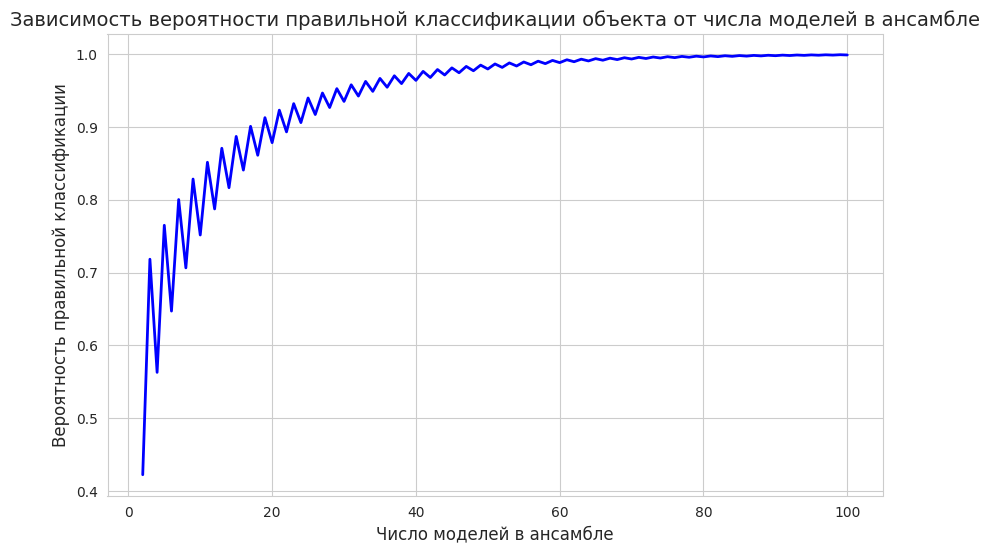

In [42]:
def majority_vote_probability_alternative(nmodels, p):
    total_probability = 0
    for i in range(nmodels // 2 + 1, nmodels + 1):
        total_probability += comb(nmodels, i) * (p**i) * ((1 - p)**(nmodels - i))
    return total_probability

p = 0.65
num_models_values = np.arange(2, 101)
accuracies = [majority_vote_probability_alternative(num_models, p) for num_models in num_models_values]

plt.figure(figsize=(10, 6))
plt.plot(num_models_values, accuracies, color='blue', linewidth=2)
plt.xlabel('–ß–∏—Å–ª–æ –º–æ–¥–µ–ª–µ–π –≤ –∞–Ω—Å–∞–º–±–ª–µ', fontsize=12)
plt.ylabel('–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏', fontsize=12)
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –æ–±—ä–µ–∫—Ç–∞ –æ—Ç —á–∏—Å–ª–∞ –º–æ–¥–µ–ª–µ–π –≤ –∞–Ω—Å–∞–º–±–ª–µ', fontsize=14)
plt.grid(True)
plt.show()


–û–ø–∏—à–∏—Ç–µ –≤–∞—à–∏ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è.
–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç:

* –ó–Ω–∞—á–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π –ø—Ä–∏ –∏—Ö —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞.
–ì—Ä–∞—Ñ–∏–∫ - —Å–∏–≥–º–æ–∏–¥–∞, —Å —Ä–µ–∑–∫–∏–º –∏–∑–≥–∏–±–æ–º –≤ —Ä–∞–π–æ–Ω–µ p = 0.5. –ü—Ä–∏—á–µ–º –ø—Ä–∏ –¥–æ—Å—Ç–∏–∂–µ–Ω–∏–∏ ~0.6 –≥—Ä–∞—Ñ–∏–∫ –Ω–∞—á–∏–Ω–∞–µ—Ç –≤—ã—Ö–æ–¥–∏—Ç—å –Ω–∞ –ø–ª–∞—Ç–æ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è –≤ —Ä–∞–π–æ–Ω–µ 1(–ø—Ä–∏ p –æ—Ç–¥–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –≤ 0.6! —É–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ!!). –ü–æ–ª—É—á–∞–µ—Ç—Å—è, –¥–ª—è –∞–Ω—Å–∞–º–±–ª—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –Ω–µ–±–æ–ª—å—à–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π –≤ —Å—Ç–æ—Ä–æ–Ω—É > 0.5 –¥–ª—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –æ–¥–Ω–æ–æ–∑–Ω–∞—á–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏(–≤–µ—Ä–Ω–æ–π).

* –ö–æ–ª–∏—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º p –≤–∏–¥–∏–º –≥—Ä–∞—Ñ–∏–∫ "–Ω–∞—Å—ã—â–µ–Ω–∏—è", –≥–¥–µ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π –¥–∞–µ—Ç —Å–Ω–∞—á–∞–ª–∞ —Ä–µ–∑–∫–∏, –ø–æ—Ç–æ–º –ø–ª–∞–≤–Ω—ã–π —Ä–æ—Å—Ç –∫ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, —Ä–æ—Å—Ç –≤ –∏—Ç–æ–≥–µ –≤—ã—Ö–æ–¥–∏—Ç –Ω–∞ –ø–ª–∞—Ç–æ –≤ —Ä–∞–π–æ–Ω–µ 80 –º–æ–¥–µ–ª–µ–π, –≥–¥–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ ~1. –ù—É–∂–Ω–æ –ø–æ–Ω–∏–º–∞—Ç—å, —á—Ç–æ —Ä–æ—Å—Ç –±—É–¥–µ—Ç —Ç–µ–º —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–µ–µ, —á–µ–º –≤—ã—à–µ —É –Ω–∞—Å p –æ—Ç–¥–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏(–∏ –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ p>=0.5, —Ç–∞–∫ –∫–∞–∫ –∑–Ω–∞—á–µ–Ω–∏—è –≤—ã—à–µ –±—É–¥—É—Ç –¥–∞–≤–∞—Ç—å –≥—Ä–∞—Ñ–∏–∫ —É–º–µ–Ω—å—à–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ - —Å—á–∏—Ç–∞–π, –æ—Ç—Ä–∞–∂–µ–Ω–Ω—ã–π –ø–æ –≤–µ—Ä—Ç–∏–∫–∞–ª–∏)

–í—ã–≤–æ–¥—ã: 
1. –î–∞–∂–µ –ø—Ä–∏ –Ω–µ–±–æ–ª—å—à–∏—Ö —É—Å–ø–µ—Ö–∞—Ö –æ—Ç–¥–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ –¥–æ–±–∏—Ç—å—Å—è —É–≤–µ—Ä–µ–Ω–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≤ —Å–ª—É—á–∞–µ –∏—Ö –∞–Ω—Å–∞–º–±–ª–µ–π
2. –ß–µ–º –±–æ–ª—å—à–µ –º–æ–¥–µ–ª–µ–π, —Ç–µ–º –ª—É—á—à–µ) –û–¥–Ω–∞–∫–æ, —á—Ç–æ–±—ã —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–µ —Ä–µ—Å—É—Ä—Å—ã, –∑–∞—Ä–∞–Ω–µ–µ –æ—Ü–µ–Ω–∏—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π –¥–ª—è –Ω—É–∂–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤. –ê –µ—Å–ª–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞—Å —É—Å—Ç—Ä–∞–∏–≤–∞—é—Ç - –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –º–æ–∂–Ω–æ –ª–∏ —É–º–µ–Ω—å—à–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π –±–µ–∑ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø–æ—Ç–µ—Ä–∏ –∫–∞—á–µ—Å—Ç–≤–∞.


#### –ó–∞–¥–∞–Ω–∏–µ 2. 2. –†–µ–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ—Å—Ç–æ–≥–æ RF

**4 –±–∞–ª–ª–∞**

–†–µ–∞–ª–∏–∑—É–π—Ç–µ —Å–≤–æ–π —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–π –∫–ª–∞—Å—Å `RandomForestClassifierCustom`, –∏—Å–ø–æ–ª—å–∑—É—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ `DecisionTreeClassifier` –∏–∑ `sklearn`.

–ù–µ–±–æ–ª—å—à–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ:
- –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã–π –Ω–∏–∂–µ –∫–æ–¥
- –í –º–µ—Ç–æ–¥–µ `fit` –≤ —Ü–∏–∫–ª–µ (`i` –æ—Ç 0 –¥–æ `n_estimators-1`):
    * –ó–∞—Ñ–∏–∫—Å–∏—Ä—É–π—Ç–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º np.random.seed(`random_state + i`). –ò–¥–µ—è –≤ —Ç–æ–º, —á—Ç–æ –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ —É –Ω–∞—Å –±—É–¥–µ—Ç –Ω–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª, —á—Ç–æ –¥–æ–±–∞–≤–∏—Ç –ø–æ–±–æ–ª—å—à–µ "—Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏", –Ω–æ –≤ —Ç–æ –∂–µ –≤—Ä–µ–º—è –º—ã —Å–º–æ–∂–µ–º –∏–º–µ—Ç—å –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    * –ü–æ—Å–ª–µ —á–µ–≥–æ –≤—ã–±–µ—Ä–∏—Ç–µ `max_features` –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ **–±–µ–∑ –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏—è/without replacement**, —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ —Å–ø–∏—Å–æ–∫ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–∏—Ö –∏–Ω–¥–µ–∫—Å–æ–≤) –≤ `self.feat_ids_by_tree`
    * –¢–∞–∫–∂–µ —Å–æ–∑–¥–∞–π—Ç–µ –ø—Å–µ–≤–¥–æ–≤—ã–±–æ—Ä–∫—É –ø—Ä–∏ –ø–æ–º–æ—â–∏ –±—É—Ç—Å—Ç—Ä—ç–ø–∞ (–≤—ã–±–æ—Ä **—Å –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º/with replacement**) –∏–∑ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –ú–æ–∂–µ—Ç –ø–æ–º–æ—á—å —Ñ—É–Ω–∫—Ü–∏—è `np.random.choice` –∏ –µ–µ –∞—Ä–≥—É–º–µ–Ω—Ç `replace`
    * –û–±—É—á–∏—Ç–µ –¥–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –∑–∞–¥–∞–Ω–Ω—ã–º–∏ –≤ –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä–µ –∫–ª–∞—Å—Å–∞ `max_depth`, `max_features` –∏ `random_state` –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –ø—Å–µ–≤–¥–æ–≤—ã–±–æ—Ä–∫–µ.
- –ú–µ—Ç–æ–¥ `fit` –¥–æ–ª–∂–µ–Ω –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å —Ç–µ–∫—É—â–∏–π —ç–∫–∑–µ–º–ø–ª—è—Ä –∫–ª–∞—Å—Å–∞ `RandomForestClassifierCustom`, —Ç–æ –µ—Å—Ç—å `self` (–≤—Å–µ –ø–æ-–≤–∑—Ä–æ—Å–ª–æ–º—É, –∫–∞–∫ –≤ `sklearn`)
- –í –º–µ—Ç–æ–¥–µ `predict_proba` –º—ã –¥–æ–ª–∂–Ω—ã –ø—Ä–æ–π—Ç–∏ —Ü–∏–∫–ª–æ–º –ø–æ –≤—Å–µ–º –¥–µ—Ä–µ–≤—å—è–º. –î–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –Ω–∞–º –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –±—Ä–∞—Ç—å —Ç–æ–ª—å–∫–æ —Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö —É—á–∏–ª–æ—Å—å –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –ø–æ—ç—Ç–æ–º—É –º—ã –∏ —Å–æ—Ö—Ä–∞–Ω—è–ª–∏ —ç—Ç—É –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –≤ –∞—Ä—Ç—Ä–∏–±—É—Ç–µ `self.feat_ids_by_tree`. –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –¥–æ–ª–∂–µ–Ω –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ (–º–æ–∂–Ω–æ –¥–µ–ª–∞—Ç—å –¥–≤—É–º—è —Å–ø–æ—Å–æ–±–∞–º–∏: –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –º–µ—Ç–æ–¥–∞ `predict_proba` –∏ –ø–æ—Ç–æ–º —É—Å—Ä–µ–¥–Ω—è—Ç—å —ç—Ç–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, –∏–ª–∏ –∫ –ø—Ä–∏–º–µ—Ä—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –º–µ—Ç–æ–¥–æ–º `predict` –∏ —Ç–∞–∫–∂–µ —Å—á–∏—Ç–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–µ.

In [168]:
class RandomForestClassifierCustom(BaseEstimator):
    def __init__(
        self, n_estimators=10, min_samples_leaf=1, max_depth=None, max_features=None, random_state=SEED
    ):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.min_samples_leaf = min_samples_leaf

        self.trees = []
        self.feat_ids_by_tree = []

    def fit(self, X, y):
        self.classes_ = sorted(np.unique(y))
        n_samples, n_features = X.shape
        
        for i in range(self.n_estimators):
            np.random.seed(self.random_state + i)
            feat_ids = np.random.choice(n_features, self.max_features, replace=False)
            self.feat_ids_by_tree.append(feat_ids)
            
            sample_indices = np.random.randint(0, n_samples, size=n_samples)
            X_sampled = X[sample_indices][:, feat_ids].reshape(X.shape[0], -1)
            y_sampled = y[sample_indices]
            
            tree = DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features, random_state=self.random_state)
            tree.fit(X_sampled, y_sampled)
            
            self.trees.append(tree)
            
        return self
    
    def predict_proba(self, X):
        probas = np.zeros((X.shape[0], len(self.classes_)))
        for tree, feat_ids in zip(self.trees, self.feat_ids_by_tree):
            probas += tree.predict_proba(X[:, feat_ids])

        return probas / len(self.trees)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        prediction = np.argmax(proba, axis=1)
        
        return prediction

### –ó–∞–¥–∞–Ω–∏–µ 2. Random forest

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –Ω–µ–º–Ω–æ–≥–æ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–º—Å—è –∫ —Ç–æ–º—É, —á—Ç–æ–±—ã —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Å–≤–æ–π —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–π —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å, –∞ –ø–æ—Ç–æ–º —Ä–µ–∞–ª–∏–∑—É–µ–º –µ–≥–æ.

–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º –Ω–∞—à—É —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –Ω–∞ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–∞–∑–¥–µ–ª—è—é—â—É—é –≥—Ä–∞–Ω–∏—Ü—É, –∫–æ—Ç–æ—Ä—É—é —Ä–∏—Å—É–µ—Ç –≤–∞—à–∞ –º–æ–¥–µ–ª—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–∏ `plot_decision_boundary` (—Å–º. –ø—Ä–∏–º–µ—Ä—ã –≤ –ª–µ–∫—Ü–∏–∏).

In [156]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#ffdab9","#9898ff", "#4B0082"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(["#ffdab9", "#4c4c7f", "#4B0082"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

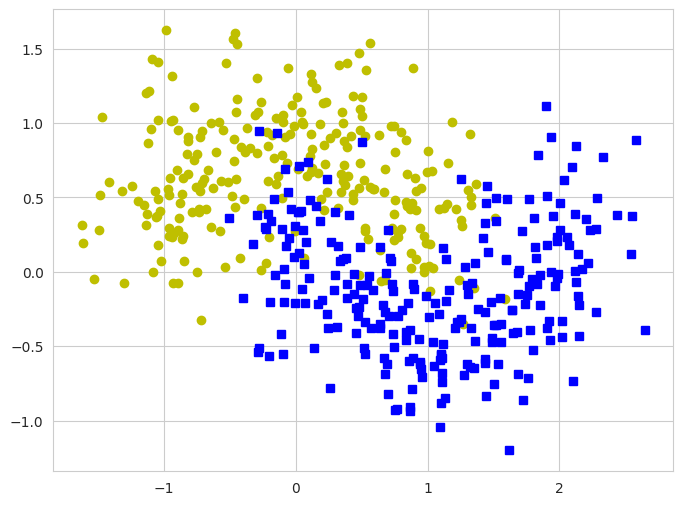

In [157]:
X, y = datasets.make_moons(n_samples=500, noise=0.30, random_state=SEED)

plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.show()

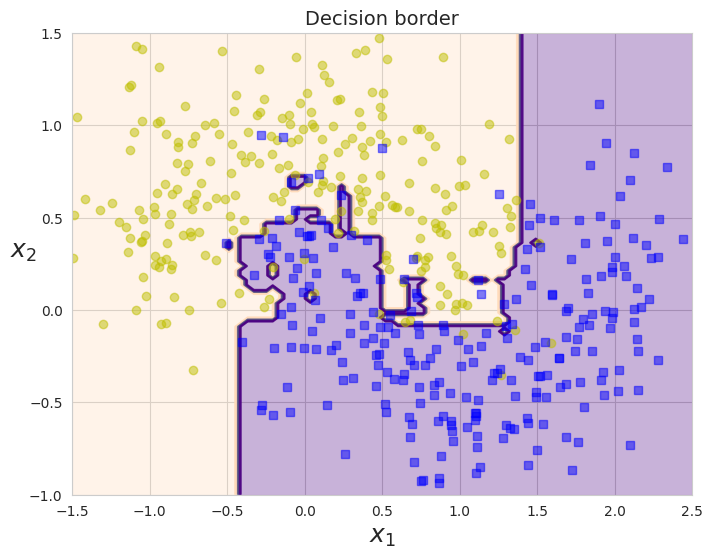

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

plt.figure(figsize=(8, 6))
clf = RandomForestClassifierCustom(max_depth=20, max_features=2)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X, y)
plt.title("Decision border", fontsize=14)
plt.show()

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–∞–ª—å–Ω–æ–µ, –æ–¥–Ω–∞–∫–æ —è–≤–Ω–æ –≤–∏–¥–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –∏ –≤—ã—Å–æ–∫–∏–π variance.

–ü–æ–¥–±–µ—Ä–∏—Ç–µ –Ω–∞–∏–ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –ø—Ä–∏ –∫–æ—Ç–æ—Ä—ã—Ö —Ä–∞–∑–¥–µ–ª—è—é—â–∞—è –≥—Ä–∞–Ω–∏—Ü–∞ –±—É–¥–µ—Ç, –Ω–∞ –≤–∞—à –≤–∑–≥–ª—è–¥, –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è bias-variance. –ú–æ–∂–Ω–æ —Ç–∞–∫–∂–µ –ø–æ–¥–∫–ª—é—á–∏—Ç—å –∫–∞–∫–∏–µ-—Ç–æ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –≤—ã–±–æ—Ä–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏.

In [176]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 8, 14, 20],
    'max_features': [1, 2],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifierCustom()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 200}


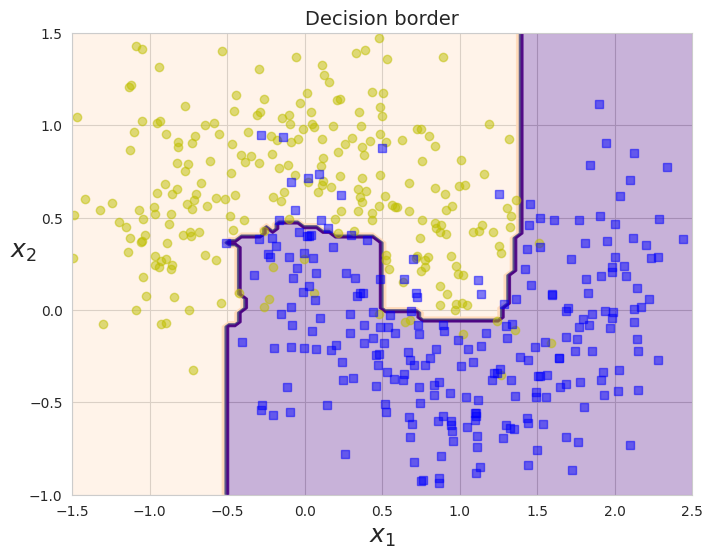

In [177]:
plt.figure(figsize=(8, 6))
clf = RandomForestClassifierCustom(max_depth=5, max_features=2, min_samples_leaf=1, n_estimators=200)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X, y)
plt.title("Decision border", fontsize=14)
plt.show()

–í–æ—Ç —ç—Ç–æ –≤–æ—Ç –±–æ–≥–æ—É–≥–æ–¥–Ω–µ–Ω—å–∫–æ! —Ö–æ—Ä–æ—à–∏–π bias-variance –±–∞–ª–∞–Ω—Å, —è —Å—á–∏—Ç–∞—é

In [178]:

# –û—Ü–µ–Ω–∫–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = f1_score(y_true=y_test, y_pred=y_pred)
print("Accuracy of the best model:", accuracy)

Accuracy of the best model: 0.9166666666666666


f1 score —Ç–æ–∂–µ –Ω–µ–ø–ª–æ—Ö–æ —Å–µ–±—è –ø–æ–∫–∞–∑–∞–ª.

#### –ó–∞–¥–∞–Ω–∏–µ 2. 3. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π

**3 –±–∞–ª–ª–∞**

–ö–∞–∫ –º—ã –≤—ã—è–Ω–∏–ª–∏ –Ω–∞ –ª–µ–∫—Ü–∏–∏, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã bagging —Ä–∞–±–æ—Ç–∞–ª —Ö–æ—Ä–æ—à–æ, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞—à–∏—Ö –º–æ–¥–µ–ª–µ–π –Ω–µ –¥–æ–ª–∂–Ω—ã —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞—Ç—å. –î–ª—è —ç—Ç–æ–≥–æ –≤ —Å–ª—É—á–∞–π–Ω–æ–º –ª–µ—Å–µ –ø—Ä–∏–º–µ–Ω—è—é—Ç—Å—è —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã, –≤ —Ç–æ–º —á–∏—Å–ª–µ –∏ RSM. –î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –≤–ª–∏—è–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä `max_features` –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –≤ —Å–ª—É—á–∞–π–Ω–æ–º –ª–µ—Å—É –∏–∑ `sklearn`. –í –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–º–µ—Ä–∞ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç `breast_cancer`. –î–ª—è —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—É—é –Ω–∏–∂–µ —Ñ—É–Ω–∫—Ü–∏—é `base_model_pair_correlation`. –î–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ —É –≤–∞—Å –±—É–¥–µ—Ç –ø–æ–ª—É—á–∞—Ç—å—Å—è –Ω–∞–±–æ—Ä –∑–Ω–∞—á–µ–Ω–∏–π (–ø–æ–ø–∞—Ä–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤—Å–µ—Ö –¥–µ—Ä–µ–≤—å–µ–≤), –¥–∞–ª—å—à–µ –º–æ–∂–Ω–æ –∏–∑–æ–±—Ä–∞–∑–∏—Ç—å –∏—Ö –≤ –≤–∏–¥–µ –±–æ–∫—Å–ø–ª–æ—Ç–æ–≤, –∫–∞–∫ –º—ã –Ω–∞ –ª–µ–∫—Ü–∏–∏ —Ä–∏—Å–æ–≤–∞–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫.

In [235]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –ø–æ–ø–∞—Ä–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –≤ —Å–ª—É—á–∞–π–Ω–æ–º –ª–µ—Å—É
def base_model_pair_correlation(ensemble, X_test):
    corrs = []
    for (i, est1), (j, est2) in combinations(enumerate(ensemble.estimators_), 2):
        ypred_t1 = est1.predict_proba(X_test)[:, 1]
        ypred_t2 = est2.predict_proba(X_test)[:, 1]

        corrs.append(pearsonr(ypred_t1, ypred_t2)[0])
    return np.array(corrs)

In [236]:
# –ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [237]:
model1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED)
model1.fit(X_train, y_train)

correlations = base_model_pair_correlation(model1, X_test)

In [238]:
print(f'{min(correlations) = }',
      f'{max(correlations) = }',
       f'{np.mean(correlations) = }', sep='\n')

min(correlations) = 0.610628568994068
max(correlations) = 0.9573043795157633
np.mean(correlations) = 0.7856250038674629


–í—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏(

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –Ω–∞ —ç—Ç–æ –≤–ª–∏—è–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä `max_depth`:

In [239]:
max_depth_values = [5, 10, 15, 20]
correlations_per_max_depth = {}

for max_depth in max_depth_values:
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=SEED)
    model.fit(X_train, y_train)
    
    correlations = base_model_pair_correlation(model, X_test)
    correlations_per_max_depth[max_depth] = correlations

for max_depth, correlations in correlations_per_max_depth.items():
    print(f"Max Depth: {max_depth}")
    print(f"Mean Correlation: {np.mean(correlations)}")
    print(f"Std Correlation: {np.std(correlations)}")

Max Depth: 5
Mean Correlation: 0.8134916193685199
Std Correlation: 0.04773888497232329
Max Depth: 10
Mean Correlation: 0.7856250038674629
Std Correlation: 0.052293532701241305
Max Depth: 15
Mean Correlation: 0.7851451352261626
Std Correlation: 0.05263466856007994
Max Depth: 20
Mean Correlation: 0.7851451352261626
Std Correlation: 0.05263466856007994


–û–ø–∏—à–∏—Ç–µ –≤–∞—à–∏ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è:

* –í–∏–¥–Ω–æ, —á—Ç–æ —Å –ø–æ–≤—ã—à–µ–Ω–∏–µ–º –≥–ª—É–±–∏–Ω—ã —É –Ω–∞—Å –ø–æ–Ω–∏–∂–∞–µ—Ç—Å—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è. –≠—Ç–æ –Ω–µ—É–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ: —á–µ–º –±–æ–ª—å—à–µ –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞, —Ç–µ–º –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–æ—Ä–º–∞—Ü–∏–π –æ–Ω–æ –º–æ–∂–µ—Ç –∏–º–µ—Ç—å -> –º–µ–Ω—å—à–µ —à–∞–Ω—Å —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è –¥–≤—É—Ö —Ä–∞–∑–Ω—ã—Ö –¥–µ—Ä–µ–≤—å–µ–≤ –≤ –∞–Ω—Å–∞–º–±–ª–µ

### –ó–∞–¥–∞–Ω–∏–µ 3. –°—Ç—Ä–æ–∏–º –±–æ–ª—å—à–æ–π –∞–Ω—Å–∞–º–±–ª—å

**4 –±–∞–ª–ª–∞ + 3 –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–∞ —Å–∫–æ—Ä –≤—ã—à–µ 0.87**

–í –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –≤–∞–º –Ω—É–∂–Ω–æ –¥–∏–∞–≥–Ω–æ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å —Å–µ—Ä–¥–µ—á–Ω–æ–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ —É –ª—é–¥–µ–π –ø–æ –º–µ–¥–∏—Ü–∏–Ω—Å–∫–∏–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º.

In [10]:
heart_dataset = pd.read_csv("../data/heart.csv")

In [11]:
X = heart_dataset.drop("target", axis=1)
y = heart_dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)
X_train.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
178   43    1   0       120   177    0        0      120      1      2.5   
298   57    0   0       140   241    0        1      123      1      0.2   
201   60    1   0       125   258    0        0      141      1      2.8   
246   56    0   0       134   409    0        0      150      1      1.9   
153   66    0   2       146   278    0        0      152      0      0.0   

     slope  ca  thal  
178      1   0     3  
298      1   0     3  
201      1   1     3  
246      1   2     3  
153      1   1     2

–û–±—É—á–∏—Ç–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã, –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã–µ –Ω–∏–∂–µ, –∞ —Ç–∞–∫–∂–µ –∞–Ω—Å–∞–º–±–ª—å `VotingClassifier` –∏–∑ `sklearn.ensemble`, –æ–±—ä–µ–¥–∏–Ω—è—é—â–∏–π —ç—Ç–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã —Å –ø–æ–º–æ—â—å—é –∂–µ—Å—Ç–∫–æ–≥–æ –∏–ª–∏ –º—è–∫–æ–≥–æ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏—è (–ø–∞—Ä–∞–º–µ—Ç—Ä `voting =` `'hard'` –∏–ª–∏ `'soft'` —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ). –û—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π —Å –ø–æ–º–æ—â—å—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ, –∏—Å–ø–æ–ª—å–∑—É—è —Ñ—É–Ω–∫—Ü–∏—é `cross_val_score` –∏ –º–µ—Ç—Ä–∏–∫—É `f1`. –ß–∞—Å—Ç—å –º–æ–¥–µ–ª–µ–π –æ—Ç—Å—é–¥–∞ –º—ã –Ω–µ –ø—Ä–æ—Ö–æ–¥–∏–ª–∏, –æ –Ω–∏—Ö –º–æ–∂–Ω–æ –ø–æ—á–∏—Ç–∞—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ, –Ω–æ –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –¥–ª—è –∑–∞–¥–∞–Ω–∏—è –Ω–µ –æ—á–µ–Ω—å –≤–∞–∂–Ω–æ –∑–Ω–∞—Ç—å –ø—Ä–∏–Ω—Ü–∏–ø—ã –∏—Ö —Ä–∞–±–æ—Ç—ã (–Ω–æ, –µ—Å–ª–∏ –µ—Å—Ç—å –≤—Ä–µ–º—è, —Ç–æ –ø–æ—á–∏—Ç–∞–π—Ç–µ, —Ç–∞–º –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ).

In [12]:
dt = DecisionTreeClassifier(random_state=SEED, max_depth=10, min_samples_leaf=10)
rf = RandomForestClassifier(n_estimators=50, random_state=SEED)
etc = ExtraTreesClassifier(random_state=SEED)
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
svc_lin = SVC(kernel='linear', probability=True, random_state=SEED)
svc_rbf = SVC(kernel='rbf', probability=True, random_state=SEED)
cat = catboost.CatBoostClassifier(verbose=0, random_seed=SEED)
lgbm = lightgbm.LGBMClassifier(random_state=SEED)
lgbm_rf = lightgbm.LGBMClassifier(boosting_type="rf", bagging_freq=1, bagging_fraction=0.7, random_state=SEED)
xgb = xgboost.XGBClassifier(random_state=SEED)
xgb_rf = xgboost.XGBRFClassifier(random_state=SEED)
lr = LogisticRegression(solver='liblinear', max_iter=10000)
nb = GaussianNB()

base_models = [("DT", dt), ("RF", rf), 
               ("ETC", etc), ("KNN", knn), 
               ("SVC_LIN", svc_lin), ("SVC_RBF", svc_rbf), 
               ("CAT", cat), ("LGBM", lgbm), 
               ("LGBM_RF", lgbm_rf), ("XGB", xgb), 
               ("XGB_RF", xgb_rf), ("LR", lr), ("NB", nb)]

–ó–¥–µ—Å—å –º–æ–≥—É—Ç –≤–æ–∑–Ω–∏–∫–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –±—É—Å—Ç–∏–Ω–≥–æ–≤, –Ω–µ –≤–æ–ª–Ω—É–π—Ç–µ—Å—å, –≤—Å–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, –ø—Ä–æ—Å—Ç–æ –æ–Ω–∏ –æ–±—ã—á–Ω–æ –æ—á–µ–Ω—å —Ä–∞–∑–≥–æ–≤–æ—Ä—á–∏–≤—ã–µ)

In [13]:
## ENTER YOUR CODE HERE (/¬Ø‚ó° ‚Äø ‚ó°)/¬Ø‚òÜ*##
voting_hard = VotingClassifier(estimators=base_models, voting='hard')
voting_soft = VotingClassifier(estimators=base_models, voting='soft')
model_scoring = {}
## END YOUR CODE HERE ##

for model in [dt, rf, cat, etc, knn, svc_lin, svc_rbf, xgb, lgbm, xgb_rf, lgbm_rf, lr, nb, voting_hard, voting_soft]: 
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="f1")
    if model == voting_hard: # –≠—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ —É voting_hard –∏ soft –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤
        model_scoring['voting_hard'] = scores.mean()
    elif model == voting_soft:
        model_scoring['voting_soft'] = scores.mean()
    else:
        model_scoring[model.__class__.__name__] = scores.mean()

[LightGBM] [Info] Number of positive: 79, number of negative: 72
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 151, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523179 -> initscore=0.092782
[LightGBM] [Info] Start training from score 0.092782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [14]:
for key, value in model_scoring.items():
    print(key, 'mean score:', value)

DecisionTreeClassifier mean score: 0.797997226792219
RandomForestClassifier mean score: 0.8328751280279528
CatBoostClassifier mean score: 0.8342715174922052
ExtraTreesClassifier mean score: 0.8281746031746032
KNeighborsClassifier mean score: 0.6493313763861709
SVC mean score: 0.6973119072190279
XGBClassifier mean score: 0.8134522115571786
LGBMClassifier mean score: 0.8132478632478634
XGBRFClassifier mean score: 0.8499478840942256
LogisticRegression mean score: 0.8500073681108163
GaussianNB mean score: 0.8140676625250128
voting_hard mean score: 0.8494440278941667
voting_soft mean score: 0.8455110375195781


–í—ã –º–æ–∂–µ—Ç–µ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –∞–Ω—Å–∞–º–±–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ö–æ—Ä–æ—à–µ–µ, –Ω–æ –Ω–µ –ª—É—á—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –ø–æ–ø—Ä–æ–±—É–µ–º –µ–≥–æ —É–ª—É—á—à–∏—Ç—å. –ö–∞–∫ –≤—ã –∑–Ω–∞–µ—Ç–µ, –∞–Ω—Å–∞–º–±–ª–∏ —Ä–∞–±–æ—Ç–∞—é—Ç –ª—É—á—à–µ, –∫–æ–≥–¥–∞ –º–æ–¥–µ–ª–∏, –≤—Ö–æ–¥—è—â–∏–µ –≤ –Ω–∏—Ö –Ω–µ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –≤ –∞–Ω—Å–∞–º–±–ª–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö, –∏ —É–¥–∞–ª–∏—Ç–µ –∏–∑ –∞–Ω—Å–∞–º–±–ª—è —Ç–µ –º–æ–¥–µ–ª–∏, —á—å–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±—É–¥—É—Ç —Å–∏–ª—å–Ω–µ–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞—Ç—å —Å –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏. –í–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å —Ñ—É–Ω–∫—Ü–∏–µ–π `base_model_pair_correlation_for_voting_clf`. **–°–ø–æ–π–ª–µ—Ä**: –¥–∞–ª–µ–∫–æ –Ω–µ —Ñ–∞–∫—Ç, —á—Ç–æ –µ—Å–ª–∏ –≤—ã —É–¥–∞–ª–∏—Ç–µ –¥–≤–µ –º–æ–¥–µ–ª–∏ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π 0.95, —Ç–æ –≤—Å–µ —Å—Ç–∞–Ω–µ—Ç —Å–∏–ª—å–Ω–æ –ª—É—á—à–µ, –∑–¥–µ—Å—å –≤—Å–µ –±—É–¥–µ—Ç –Ω–µ–º–Ω–æ–≥–æ —Å–ª–æ–∂–Ω–µ–µ. –ß—Ç–æ–±—ã –¥–æ–±–∏—Ç—å—Å—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–∂–µ—Ç –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è –¥–æ–ª–≥–∏–π –ø–µ—Ä–µ–±–æ—Ä —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –º–æ–¥–µ–ª–µ–π. –ù–∞–∏–ª—É—á—à–∏–π —Å–∫–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –º–Ω–µ —É–¥–∞–ª–æ—Å—å –¥–æ—Å—Ç–∏—á—å, —ç—Ç–æ 0.915, –Ω–æ –æ–Ω –ø–æ–ª—É—á–µ–Ω –≤–µ—Å—å–º–∞ —Å—Ç—Ä–∞–Ω–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–µ–π –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤, –∞ –µ—â–µ –∏ –ø—Ä–æ—Å—Ç—ã–º –ø–µ—Ä–µ–±–æ—Ä–æ–º –≤—Å–µ—Ö –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤)

In [15]:
def base_model_pair_correlation_for_voting_clf(ensemble, X):
    corrs = []
    base_model_names = [f"{est.__class__.__name__}" for est in ensemble.estimators_]
    for (i, est1), (j, est2) in combinations(enumerate(ensemble.estimators_), 2):
        Xi_test = X
        Xj_test = X

        if not isinstance(est1, SVC):
            ypred_t1 = est1.predict_proba(Xi_test)[:, 1]
        else:
            ypred_t1 = est1.decision_function(Xi_test)


        if not isinstance(est2, SVC):
            ypred_t2 = est2.predict_proba(Xi_test)[:, 1]
        else:
            ypred_t2 = est2.decision_function(Xi_test)
        corrs.append((est1, est2, pearsonr(ypred_t1, ypred_t2)[0]))


    return corrs

In [16]:
def remove_highly_correlated_models(voting_clf, X_test, threshold=0.8):
    corrected_models = voting_clf.estimators_
    blank = VotingClassifier(estimators=voting_clf.estimators, voting=voting_clf.voting) # —á—Ç–æ–±—ã –Ω–µ –º–µ–Ω—è—Ç—å .estimators_ —É –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –∞–Ω—Å–∞–º–±–ª—è
    blank.estimators_ = voting_clf.estimators_
    correlations = base_model_pair_correlation_for_voting_clf(blank, X_test)
    
    max_corr_value = 0
    
    for i, (est1, est2, corr) in enumerate(correlations):
        if corr > max_corr_value:
            model_to_delete = est1
            max_corr_value = corr
    
    while max_corr_value > threshold:
        # –£–¥–∞–ª—è–µ–º –º–æ–¥–µ–ª—å —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π –∏–∑ –∞–Ω—Å–∞–º–±–ª—è
        corrected_models = [est for est in corrected_models if est != model_to_delete]
        # –û–±–Ω–æ–≤–ª—è–µ–º —Å–ø–∏—Å–æ–∫ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
        blank.estimators_ = corrected_models
        correlations = base_model_pair_correlation_for_voting_clf(blank, X_test)
        
        # –ù–∞—Ö–æ–¥–∏–º –Ω–æ–≤—É—é –º–æ–¥–µ–ª—å —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π
        max_corr_value = 0
        for i, (est1, est2, corr) in enumerate(correlations):
            if corr > max_corr_value:
                model_to_delete = est1
                max_corr_value = corr
    
    estimators = []
    for model in corrected_models:
        estimators.append((model.__class__.__name__, model))
    return estimators # —Ä–µ—à–∏–ª –≤–º–µ—Å—Ç–æ —Ç–æ–≥–æ, —á—Ç–æ–±—ã –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å VotingClassifier, –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å estimators list, —á—Ç–æ–±—ã –∑–∞—Ç–µ–º –µ–≥–æ –º–æ–∂–Ω–æ –±—ã–ª–æ –æ—Ç—Ä–µ–¥–∞–∫—Ç–∏—Ä–æ–≤–∞—Ç—å –∏ —Å–æ–∑–¥–∞—Ç—å –∞–Ω—Å–∞–º–±–ª—å

In [17]:
voting_hard.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 118, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 227, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.519824 -> initscore=0.079337
[LightGBM] [Info] Start training from score 0.079337
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=10,
                                                     random_state=111)),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=111)),
                             ('ETC', ExtraTreesClassifier(random_state=111)),
                             ('KNN', KNeighborsClassifier(weights='distance')),
                             ('SVC_LIN',
                              SVC(kernel='linear', probability=True,
                                  random_state=111)),
                             ('SVC_RBF',
                              SV...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logistic',
                                              random_state=111, reg_alpha=None, ...)),
                             ('LR',
                              LogisticRegression(max_iter=10000,
                                                 solver='liblinear')),
                             ('NB', GaussianNB())])

In [26]:
corrected_estimators = remove_highly_correlated_models(voting_hard, X_test, threshold=0.90)
corrected_voting_hard = VotingClassifier(estimators=corrected_estimators, voting='hard')
corrected_voting_hard.fit(X_train, y_train) # –Ω–æ–≤—ã–π –∞–Ω—Å–∞–º–±–ª—å
print('–û—Ü–µ–Ω–∫–∞ –∫—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è –Ω–æ–≤–æ–≥–æ –∞–Ω—Å–∞–º–±–ª—è:', cross_val_score(corrected_voting_hard, X_train, y_train, cv=3, scoring="f1").mean())

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging

–û—Ü–µ–Ω–∫–∞ —Å—Ç–∞–ª–∞ –ø–æ–≤—ã—à–µ, –Ω–æ –Ω–µ –Ω–∞–º–Ω–æ–≥–æ. –î–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º —á—Ç–æ –Ω–∏–±—É–¥—å —É–±—Ä–∞—Ç—å/–¥–æ–±–∞–≤–∏—Ç—å, –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (–¥—Ä—É–≥–∏–µ threshold –ø—Ä–æ–≤–µ—Ä—è–ª, –æ–Ω–∏ —Ö—É–∂–µ)

In [27]:
corrected_estimators.append(('RF', RandomForestClassifier(n_estimators=300, random_state=111, min_samples_split=20, min_samples_leaf=10))) # —Ä–µ—à–∏–ª –¥–æ–±–∞–≤–∏—Ç—å random forest —Å –Ω–æ–≤—ã–º–∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏(–≤—Ä–æ–¥–µ –Ω–µ –±—ã–ª–æ –∑–∞–ø—Ä–µ—â–µ–Ω–æ)

In [28]:
del corrected_estimators[-2] # –º–∞–≥–∏—è –ø–µ—Ä–µ–±–æ—Ä–∞
del corrected_estimators[2]

In [29]:
corrected_voting_hard = VotingClassifier(estimators=corrected_estimators, voting='hard')
corrected_voting_hard.fit(X_train, y_train) # –Ω–æ–≤—ã–π –∞–Ω—Å–∞–º–±–ª—å

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=10,
                                                     random_state=111)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(weights='distance')),
                             ('XGBRFClassifier',
                              XGBRFClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rou...
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logistic',
                                              random_state=111, reg_alpha=None, ...)),
                             ('LogisticRegression',
                              LogisticRegression(max_iter=10000,
                                                 solver='liblinear')),
                             ('RF',
                              RandomForestClassifier(min_samples_leaf=10,
                                                     min_samples_split=20,
                                                     n_estimators=300,
                                                     random_state=111))])

In [30]:
print('–û—Ü–µ–Ω–∫–∞ –∫—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è –Ω–æ–≤–æ–≥–æ –∞–Ω—Å–∞–º–±–ª—è:', cross_val_score(corrected_voting_hard, X_train, y_train, cv=3, scoring="f1").mean())

–û—Ü–µ–Ω–∫–∞ –∫—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è –Ω–æ–≤–æ–≥–æ –∞–Ω—Å–∞–º–±–ª—è: 0.8703727245760916


–ë–æ–ª—å—à–µ 0.87!

### –ó–∞–¥–∞–Ω–∏–µ 4. –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç—Ç–æ–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–∑ —Ç–µ–ª–µ–∫–æ–º–∞

**6 –±–∞–ª–ª–æ–≤ + 7 –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–∞ –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –∏ —Ä–∞–∑–ª–∏—á–Ω—ã–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã**

–ë—É–¥–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å, —É–π–¥–µ—Ç –ª–∏ –æ—Ç –Ω–∞—Å –∫–ª–∏–µ–Ω—Ç (–ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è `Churn?`). –î–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ —Å–∫–∞—á–∞—Ç—å [–∑–¥–µ—Å—å](https://www.kaggle.com/venky12347/churn-telecom). –≠—Ç–æ –±—É–¥–µ—Ç —É–∂–µ —Å–æ–≤—Å–µ–º –≤–∑—Ä–æ—Å–ª–æ–µ –∑–∞–¥–∞–Ω–∏–µ, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –Ω–µ–≥–æ –Ω–µ—Ç. –í–∞–º –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —Å –¥–∞–Ω–Ω—ã–º–∏, –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å –∏—Ö –¥–ª—è –º–æ–¥–µ–ª–µ–π, –∞ —Ç–∞–∫–∂–µ –≤—ã–±—Ä–∞—Ç—å –ª—É—á—à—É—é –º–æ–¥–µ–ª—å. 

–ó–∞–¥–∞—á–∞ –º–∏–Ω–∏–º—É–º:

–í—ã–±–µ—Ä–∏—Ç–µ 2 –º–æ–¥–µ–ª–∏ &mdash; –æ–¥–∏–Ω —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –∏ –æ–¥–∏–Ω –±—É—Å—Ç–∏–Ω–≥ –∏–∑ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã—Ö –Ω–∏–∂–µ:

1. `xgboost.XGBClassifier`
2. `xgboost.XGBRFClassifier` &mdash; —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –æ—Ç xgboost
3. `lightgbm.LGBMClassifier`
4. `lightgbm.LGBMClassifier(boosting_type="rf")` &mdash; —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –æ—Ç lightgbm
5. `catboost.CatBoostClassifier`

–ò –ø–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —Å —Ç–µ–º, –∫–∞–∫ –¥–ª—è —ç—Ç–∏—Ö –º–æ–¥–µ–ª–µ–π –ø—Ä–∞–≤–∏–ª—å–Ω–æ –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã. –°–æ–≤–µ—Ç—É—é –≥—É–≥–ª–∏—Ç—å –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–ª–µ–¥—É—é—â–µ–µ `how to choose best hyperparameters for lightgbm`. –¢–∞–º –≤—ã –Ω–∞–π–¥–µ—Ç–µ –∫—É—á—É —Å–ª–æ–∂–Ω–æ–≥–æ –∏ –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ–≥–æ –∫–æ–¥–∞, –Ω–æ –µ—Å–ª–∏ —Å –Ω–∏–º —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –∏ –Ω–∞—É—á–∏—Ç—å—Å—è –æ–±—É—á–∞—Ç—å –Ω–µ—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –±—É—Å—Ç–∏–Ω–≥–∏, —Ç–æ –≤ –ø–ª–∞–Ω–µ —Ç–∞–±–ª–∏—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ä–∞–≤–Ω—ã—Ö –≤–∞–º –Ω–µ –±—É–¥–µ—Ç)

In [3]:
data = pd.read_csv("../data/churn.csv")
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

array([[<Axes: title={'center': 'Account Length'}>,
        <Axes: title={'center': 'Area Code'}>,
        <Axes: title={'center': 'VMail Message'}>,
        <Axes: title={'center': 'Day Mins'}>],
       [<Axes: title={'center': 'Day Calls'}>,
        <Axes: title={'center': 'Day Charge'}>,
        <Axes: title={'center': 'Eve Mins'}>,
        <Axes: title={'center': 'Eve Calls'}>],
       [<Axes: title={'center': 'Eve Charge'}>,
        <Axes: title={'center': 'Night Mins'}>,
        <Axes: title={'center': 'Night Calls'}>,
        <Axes: title={'center': 'Night Charge'}>],
       [<Axes: title={'center': 'Intl Mins'}>,
        <Axes: title={'center': 'Intl Calls'}>,
        <Axes: title={'center': 'Intl Charge'}>,
        <Axes: title={'center': 'CustServ Calls'}>]], dtype=object)

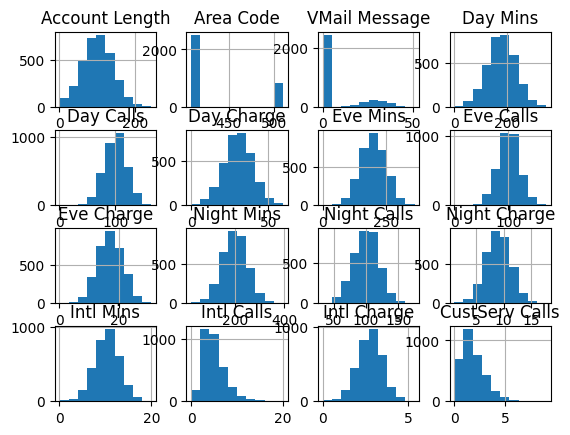

In [4]:
data.hist()

–ù–µ–ø–ª–æ—Ö–æ –±—ã–ª–æ –±—ã —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ

–î–∞–≤–∞–π—Ç–µ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä—É–µ–º –ø–ª–∞–Ω—ã –∏ churn, –∞ —Ç–∞–∫ –∂–µ –æ–ø—Ä–µ–¥–µ–ª–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

In [5]:
data.nunique()

State               51
Account Length     212
Area Code            3
Phone             3333
Int'l Plan           2
VMail Plan           2
VMail Message       46
Day Mins          1667
Day Calls          119
Day Charge        1667
Eve Mins          1611
Eve Calls          123
Eve Charge        1440
Night Mins        1591
Night Calls        120
Night Charge       933
Intl Mins          162
Intl Calls          21
Intl Charge        162
CustServ Calls      10
Churn?               2
dtype: int64

In [6]:
data['Churn?'] = (data['Churn?'] == 'True.')
data['VMail Plan'] = (data['VMail Plan'] == 'yes')
data['Int\'l Plan'] = (data['Int\'l Plan'] == 'yes')

In [7]:
data['Area Code'] = data['Area Code'].astype('category')
data['State'] = data['State'].astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   State           3333 non-null   category
 1   Account Length  3333 non-null   int64   
 2   Area Code       3333 non-null   category
 3   Phone           3333 non-null   object  
 4   Int'l Plan      3333 non-null   bool    
 5   VMail Plan      3333 non-null   bool    
 6   VMail Message   3333 non-null   int64   
 7   Day Mins        3333 non-null   float64 
 8   Day Calls       3333 non-null   int64   
 9   Day Charge      3333 non-null   float64 
 10  Eve Mins        3333 non-null   float64 
 11  Eve Calls       3333 non-null   int64   
 12  Eve Charge      3333 non-null   float64 
 13  Night Mins      3333 non-null   float64 
 14  Night Calls     3333 non-null   int64   
 15  Night Charge    3333 non-null   float64 
 16  Intl Mins       3333 non-null   float64 
 17  Intl Calls    

In [9]:
data = data.rename(columns={'Churn?': 'churn'})

In [10]:
catcols = ['Area Code', 'State', 'VMail Plan', "Int'l Plan"]
numcols = data.drop(columns=catcols).drop(columns=['Phone', 'churn']).columns
# catcols = [data.columns.get_loc(c) for c in catcols if c in data]
# numcols = [data.columns.get_loc(c) for c in numcols if c in data]

–ì–æ—Ç–æ–≤–æ!

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='churn'), 
                                                    data['churn'], 
                                                    test_size=0.2,
                                                    random_state=SEED)

In [30]:
preprocessor = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), numcols),
    ("ohe", OneHotEncoder(drop="first"), catcols)
])

params_rf = {
    'boosting_type': 'rf',
    'num_leaves': 35,
    'max_depth': 6,  # -1 means no limit
    'learning_rate': 0.1,
    'n_estimators': 300,
    'random_state': SEED,
    'feature_fraction': 0.85
}
knn_pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", lightgbm.LGBMClassifier(**params_rf))
])

params_gbdt = {
    'boosting_type': 'gbdt',
    'num_leaves': 35,
    'max_depth': 6,  # -1 means no limit
    'learning_rate': 0.2,
    'n_estimators': 300,
    'reg_alpha': 0,
    'reg_lambda': 0,
    'random_state': SEED,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.85,
    'bagging_freq': 2
}
knn_pipeline_boost = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", lightgbm.LGBMClassifier(**params_gbdt))
])

knn_pipeline_rf.fit(X_train, y_train)
knn_pipeline_boost.fit(X_train, y_train)

y_pred_rf = knn_pipeline_rf.predict(X_test)
y_pred_boost = knn_pipeline_boost.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Info] Number of positive: 389, number of negative: 2277
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2497
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145911 -> initscore=-1.767035
[LightGBM] [Info] Start training from score -1.767035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

–ü–µ—Ä–µ–±—Ä–∞–ª –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –Ω–æ —ç—Ç–∏ –≤—ã–¥–∞—é—Ç f1_score –±–æ–ª—å—à–µ, —á–µ–º —É –æ—Å—Ç–∞–ª—å–Ω—ã—Ö

In [34]:
print('accuracy_score for lightgbm randomforest:', accuracy_score(y_test, y_pred_rf))
print('accuracy_score for lightgbm gbdt:', accuracy_score(y_test, y_pred_boost))
print('f1_score for lightgbm randomforest:', f1_score(y_test, y_pred_rf))
print('f1_score for lightgbm gbdt:', f1_score(y_test, y_pred_boost))

accuracy_score for lightgbm randomforest: 0.9205397301349325
accuracy_score for lightgbm gbdt: 0.9610194902548725
f1_score for lightgbm randomforest: 0.7103825136612022
f1_score for lightgbm gbdt: 0.8452380952380952


–í–∏–¥–Ω–æ, —á—Ç–æ –ø–æ accuracy –æ–±–µ –º–æ–¥–µ–ª–∏ –æ—Ç–ª–∏—á–Ω–æ —Å–ø—Ä–∞–≤–ª—è—é—Ç—Å—è, –æ–¥–Ω–∞–∫–æ –µ—Å–ª–∏ –±—Ä–∞—Ç—å f1 score - –±—É—Å—Ç –Ω–∞ –≥–æ–ª–æ–≤—É –≤—ã—à–µ!

### –ó–∞–¥–∞–Ω–∏–µ 5. –†–∏—Å—É–µ–º

**–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ 0.5 –±–∞–ª–ª–∞**

–ù–∞–≤–µ—Ä–Ω—è–∫–∞, –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —ç—Ç–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è –≤–∞—Å –ø–µ—Ä–µ–ø–æ–ª–Ω—è–ª–∏ –∫–∞–∫–∏–µ-—Ç–æ —ç–º–æ—Ü–∏–∏. –ù–∞—Ä–∏—Å—É–π—Ç–µ —á—Ç–æ-—Ç–æ, —á—Ç–æ –±—ã –º–æ–≥–ª–æ –±—ã –ø–µ—Ä–µ–¥–∞—Ç—å –∏—Ö (—è —Å–∞–º –Ω–µ —É–º–µ—é, —Ç–∞–∫ —á—Ç–æ, –µ—Å–ª–∏ —ç—Ç–æ –±—É–¥–µ—Ç –ø—Ä–æ—Å—Ç–æ –∫–≤–∞–¥—Ä–∞—Ç, —Ç–æ–∂–µ –ø–æ–¥–æ–π–¥–µ—Ç). –ü—Ä–∏–∫—Ä–µ–ø–∏—Ç–µ —Å—é–¥–∞ —Å–≤–æ–π —Ä–∏—Å—É–Ω–æ–∫:

In [ ]:
## PASTE YOUR MASTERPIECE HERE (/¬Ø‚ó° ‚Äø ‚ó°)/¬Ø‚òÜ*##

![drawing_ensemble](../data/drawing.jpg)

### Therapy time

–ù–∞–ø–∏—à–∏—Ç–µ –∑–¥–µ—Å—å –≤–∞—à–∏ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏—è –æ –∑–∞–¥–∞–Ω–∏–∏ (–º–æ–∂–Ω–æ –∏ –Ω–µ –æ –∑–∞–¥–∞–Ω–∏–∏): –±—ã–ª–æ –ª–∏ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –±—ã–ª–æ –ª–∏ —Å–ª–∏—à–∫–æ–º –ª–µ–≥–∫–æ –∏–ª–∏ –Ω–∞–æ–±–æ—Ä–æ—Ç —Å–ª–æ–∂–Ω–æ –∏ —Ç–¥. –¢–∞–∫–∂–µ —Å—é–¥–∞ –º–æ–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å —Å–≤–æ–∏ –∏–¥–µ–∏ –ø–æ —É–ª—É—á—à–µ–Ω–∏—é –∑–∞–¥–∞–Ω–∏–π, –∞ —Ç–∞–∫–∂–µ –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å –¥–∞–Ω–Ω—ã–µ, –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–æ—Ç–æ—Ä—ã—Ö –≤—ã –±—ã —Ö–æ—Ç–µ–ª–∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –¥–∑.

**–í–∞—à–∏ –º—ã—Å–ª–∏:**

–±–æ–≥–æ—É–≥–æ–¥–Ω–æ–µ –∑–∞–¥–∞–Ω–∏–µüëç